In [67]:
# Import needed libraries
import pandas as pd
import yfinance as yf

In [68]:
# Create our dataframe
df = yf.download("FB", period="5y")

[*********************100%***********************]  1 of 1 completed


In [69]:
# View first 5 entries
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-11,130.229996,130.639999,128.229996,128.880005,128.880005,17537900
2016-10-12,129.009995,129.660004,128.460007,129.050003,129.050003,11073000
2016-10-13,128.210007,128.250000,126.750000,127.820000,127.820000,17139300
2016-10-14,128.490005,128.949997,127.580002,127.879997,127.879997,13345300
2016-10-17,128.199997,128.470001,127.320000,127.540001,127.540001,11351700


In [70]:
# Create a new dataframe; Index out the "Close" column 
new_df = df[["Close"]]

In [71]:
# View the new dataframe
new_df.head()

,Close
Date,
2016-10-11,128.880005
2016-10-12,129.050003
2016-10-13,127.820000
2016-10-14,127.879997
2016-10-17,127.540001


In [72]:
# Obtain numpy array from dataframe. Reshape to a 1D array
data = new_df.values
data = data.reshape(-1)

## Creating our Dataset

### Define Window size & Total Size

In [73]:
# Define TOTAL_SIZE & WINDOW_SIZE
WINDOW_SIZE = 60
TOTAL_SIZE = len(data)

In [74]:
TOTAL_SIZE - WINDOW_SIZE

1199

In [75]:
# Sample
sample_x = []
sample_y = []
sample_arr = [1,2,3,4,5,6,7,8]
sample_window_size = 3
sample_iter_no = 1

for i in range(len(sample_arr) - sample_window_size):
  sample_x.append(sample_arr[i: i+sample_window_size])
  sample_y.append(sample_arr[i+sample_window_size])
  print(f'This is iteration no: {sample_iter_no}')
  print(f'Added x values: {sample_arr[i: i+sample_window_size]}')
  print(f'Added y values: {sample_arr[i+sample_window_size]}')
  print(f'Current sample_x array: {sample_x}')
  print(f'Current sample_y array: {sample_y}')
  sample_iter_no += 1
  print('\n\n')

This is iteration no: 1
Added x values: [1, 2, 3]
Added y values: 4
Current sample_x array: [[1, 2, 3]]
Current sample_y array: [4]



This is iteration no: 2
Added x values: [2, 3, 4]
Added y values: 5
Current sample_x array: [[1, 2, 3], [2, 3, 4]]
Current sample_y array: [4, 5]



This is iteration no: 3
Added x values: [3, 4, 5]
Added y values: 6
Current sample_x array: [[1, 2, 3], [2, 3, 4], [3, 4, 5]]
Current sample_y array: [4, 5, 6]



This is iteration no: 4
Added x values: [4, 5, 6]
Added y values: 7
Current sample_x array: [[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6]]
Current sample_y array: [4, 5, 6, 7]



This is iteration no: 5
Added x values: [5, 6, 7]
Added y values: 8
Current sample_x array: [[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6], [5, 6, 7]]
Current sample_y array: [4, 5, 6, 7, 8]





### Looping through the data to create our Dataset

Here, we will loop for TOTAL_SIZE - WINDOW_SIZE times

For each loop, we will have `i` as our current_index

*   Obtain our x, which are the values from position `current_index` to `current_idx + 60` (Exclusive)
*   Obtain our y, which is the value at position `current_idx + 60`



In [76]:
data

array([128.88000488, 129.05000305, 127.81999969, ..., 329.22000122,
       330.04998779, 329.94009399])

In [77]:
x_arr = []
y_arr = []

for i in range(TOTAL_SIZE - WINDOW_SIZE):
  x = data[i: i+60]
  y = data[i+60]
  x_arr.append(x)
  y_arr.append(y)

Here, we will convert our x and y arrays to **NumPy arrays**

In [78]:
# Converting x_arr and y_arr
import numpy as np

x_arr = np.array(x_arr)
y_arr = np.array(y_arr)

We see that our 
- x_arr has a total of 1198 entries, with each entry having 60 values (Total of 1198 x 60 numbers)
- y_arr has a total of 1198 entries, each with a single value (Total of 1198 numbers)

In [79]:
# Viewing the shape of x_arr and y_arr
print(x_arr.shape)
print(y_arr.shape)

(1199, 60)
(1199,)


Viewing a single example from x_arr and y_arr

In [80]:
# Viewing a single entry of x
x_arr[0]

array([128.88000488, 129.05000305, 127.81999969, 127.87999725,
       127.54000092, 128.57000732, 130.11000061, 130.        ,
       132.07000732, 133.27999878, 132.28999329, 131.03999329,
       129.69000244, 131.28999329, 130.99000549, 129.5       ,
       127.16999817, 120.        , 120.75      , 122.15000153,
       124.22000122, 123.18000031, 120.80000305, 119.01999664,
       115.08000183, 117.19999695, 116.33999634, 117.79000092,
       117.01999664, 121.76999664, 121.47000122, 120.83999634,
       120.37999725, 120.41000366, 120.87000275, 118.41999817,
       115.09999847, 115.40000153, 117.43000031, 117.30999756,
       117.94999695, 118.91000366, 119.68000031, 117.76999664,
       120.30999756, 120.20999908, 120.56999969, 119.87000275,
       119.23999786, 119.08999634, 119.04000092, 117.40000153,
       117.26999664, 118.01000214, 116.91999817, 116.34999847,
       115.05000305, 116.86000061, 118.69000244, 120.66999817])

In [81]:
# Viewing a single entry of y
y_arr[0]

123.41000366210938

## Splitting our Dataset

Here, we update `TOTAL_SIZE` by minusing `WINDOW_SIZE` from it

We then define `TRAIN_SIZE` and `VAL_SIZE`. 

We will now use these to partition x_arr and y_arr to x_train, x_val, y_train, y_val

In [82]:
# Define NEW_TOTAL_SIZE, TRAIN_SIZE and VAL_SIZE
NEW_TOTAL_SIZE = TOTAL_SIZE - WINDOW_SIZE
TRAIN_SIZE = int(0.9*NEW_TOTAL_SIZE)
VAL_SIZE = NEW_TOTAL_SIZE - TRAIN_SIZE

In [83]:
eg = [1,2,3,4,5]

'''
TRAIN_SIZE = 80%
VAL_SIZE = 20%

[1,2,3,4,5] ==> [1,2,3,4], [5]
                (Train)   (Val)
'''
# len(eg) = 5
T_SIZE = int(0.8*len(eg))
V_SIZE = int(len(eg) - T_SIZE) 
# T_SIZE = 4, V_SIZE = 1
t_arr = eg[:T_SIZE]
print(t_arr)
v_arr = eg[T_SIZE:]
print(v_arr)

[1, 2, 3, 4]
[5]


In [84]:
# Split our dataset into train and validation
x_train, y_train = x_arr[:TRAIN_SIZE], y_arr[:TRAIN_SIZE]
x_val, y_val = x_arr[TRAIN_SIZE:], y_arr[TRAIN_SIZE:]

In [85]:
# View the shape of train and test
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(1079, 60)
(1079,)
(120, 60)
(120,)


## Deep Learning

### Creating our Deep Learning Model

In [86]:
NEW_TOTAL_SIZE

1199

In [87]:
# Import the needed libraries
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential

We reshape our data to be (DATASET_SIZE, ENTRY_SIZE , 1), where

- DATASET_SIZE is the number of entries in our dataset (Train or Validation)
- ENTRY_SIZE is the amount of numbers each x entry has (60 numbers per entry)


In [88]:
# We reshape our data to be (DATASET_SIZE, ENTRY_SIZE , 1)
x_train = np.expand_dims(x_train, axis=-1)
x_val = np.expand_dims(x_val, axis=-1)

In [106]:
# Define our model architecture
model = Sequential([
                    LSTM(units=50, activation="tanh", input_shape=(x_train.shape[1], x_train.shape[2])),
                    Dropout(0.1),
                    Dense(units=64, activation="relu"),
                    Dropout(0.1),
                    Dense(units=1, activation="linear")
])

In [107]:
# Overview of model architecture
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dropout_10 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                12864     
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 174,529
Trainable params: 174,529
Non-trainable params: 0
_________________________________________________________________


In [108]:
# Compile our model
model.compile(loss="mse", optimizer="adam", metrics=["mse"])

In [109]:
# Train our model
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, verbose=1)

Epoch 1/50
34/34 [==============================] - 2s 45ms/step - loss: 36995.5234 - mse: 36995.5234 - val_loss: 109842.9219 - val_mse: 109842.9219
Epoch 2/50
34/34 [==============================] - 1s 38ms/step - loss: 25351.3613 - mse: 25351.3613 - val_loss: 75948.0469 - val_mse: 75948.0469
Epoch 3/50
34/34 [==============================] - 1s 39ms/step - loss: 10302.2266 - mse: 10302.2266 - val_loss: 42980.1641 - val_mse: 42980.1641
Epoch 4/50
34/34 [==============================] - 1s 37ms/step - loss: 3005.3323 - mse: 3005.3323 - val_loss: 26075.3770 - val_mse: 26075.3770
Epoch 5/50
34/34 [==============================] - 1s 37ms/step - loss: 1997.5771 - mse: 1997.5771 - val_loss: 22558.2812 - val_mse: 22558.2812
Epoch 6/50
34/34 [==============================] - 1s 37ms/step - loss: 2045.1576 - mse: 2045.1576 - val_loss: 22522.1934 - val_mse: 22522.1934
Epoch 7/50
34/34 [==============================] - 1s 37ms/step - loss: 1346.7408 - mse: 1346.7408 - val_loss: 17901.3496

In [110]:
x_val.shape

(120, 60, 1)

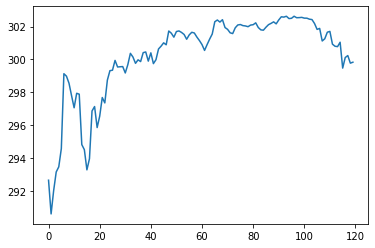

In [111]:
# Perform predictions and render them in a plot
import matplotlib.pyplot as plt

predicted = model.predict(x_val)
plt.plot(predicted)

In [112]:
predicted = predicted.reshape(-1)

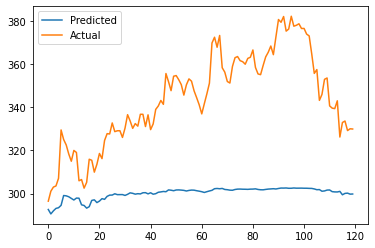

In [113]:
# Render the predictions and the original data
# 25 Epochs
plt.plot(predicted, label="Predicted")
plt.plot(y_val, label="Actual")
plt.legend()

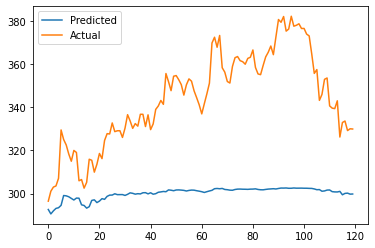

In [114]:
# Render the predictions and the original data
# 50 Epochs
plt.plot(predicted, label="Predicted")
plt.plot(y_val, label="Actual")
plt.legend()

In [115]:
x_train.shape

(1079, 60, 1)

Predict tomorrow's prices based on past 60 days (From Today)

In [116]:
today_past_sixty = data[-60:]
today_past_sixty = today_past_sixty.reshape(1, 60, 1)
model.predict(today_past_sixty)

array([[299.8282]], dtype=float32)